# Visualising Happiness data using ggplot

In [5]:
library(ggplot2)
library(dplyr)
library(maps)
library(readr)
library(RColorBrewer)

In [13]:
X2015_1_ <- read_csv("C:/Users/tshan/Desktop/2015 (1).csv")
happy <- X2015_1_ 


Parsed with column specification:
cols(
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_integer(),
  `Happiness Score` = col_double(),
  `Standard Error` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col_double(),
  Generosity = col_double(),
  `Dystopia Residual` = col_double()
)


In [14]:
head(happy)

Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [15]:
dim(happy)

[1] 158  12

In [18]:
install.packages("rworldmap",repos = "http://cran.us.r-project.org")
library(rworldmap)

Warning message:
"package 'rworldmap' is in use and will not be installed"

155 codes from your data successfully matched countries in the map
3 codes from your data failed to match with a country code in the map
88 codes from the map weren't represented in your data


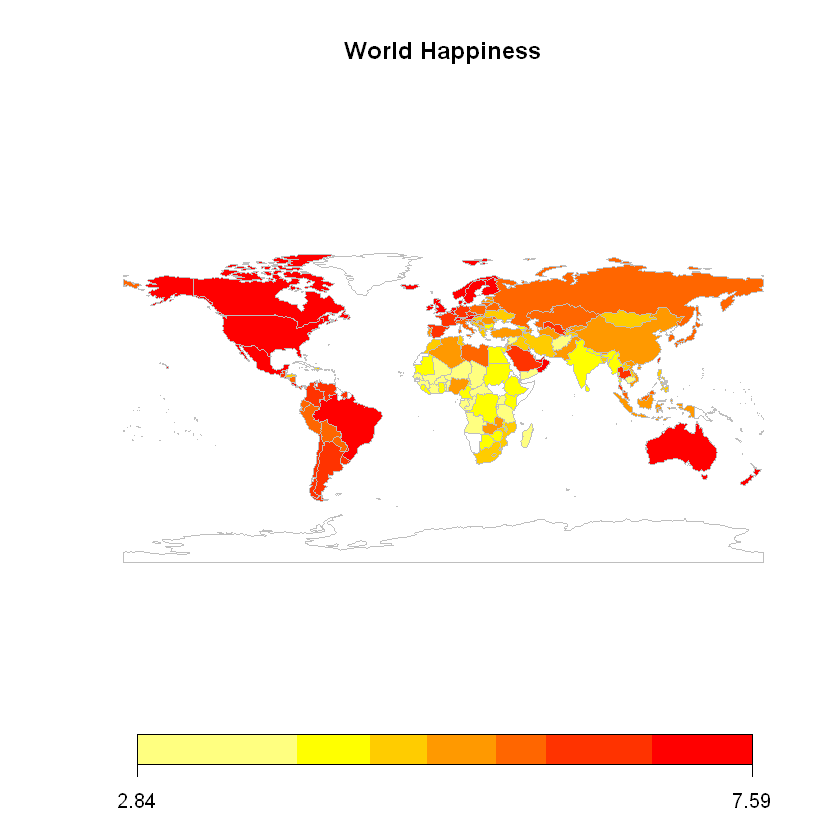

In [19]:
map <- data.frame(happy$Country,happy$`Happiness Score`)

nmap <- joinCountryData2Map(map, joinCode="NAME", nameJoinColumn="happy.Country")
mapCountryData(nmap, nameColumnToPlot="happy..Happiness.Score.", mapTitle="World Happiness")

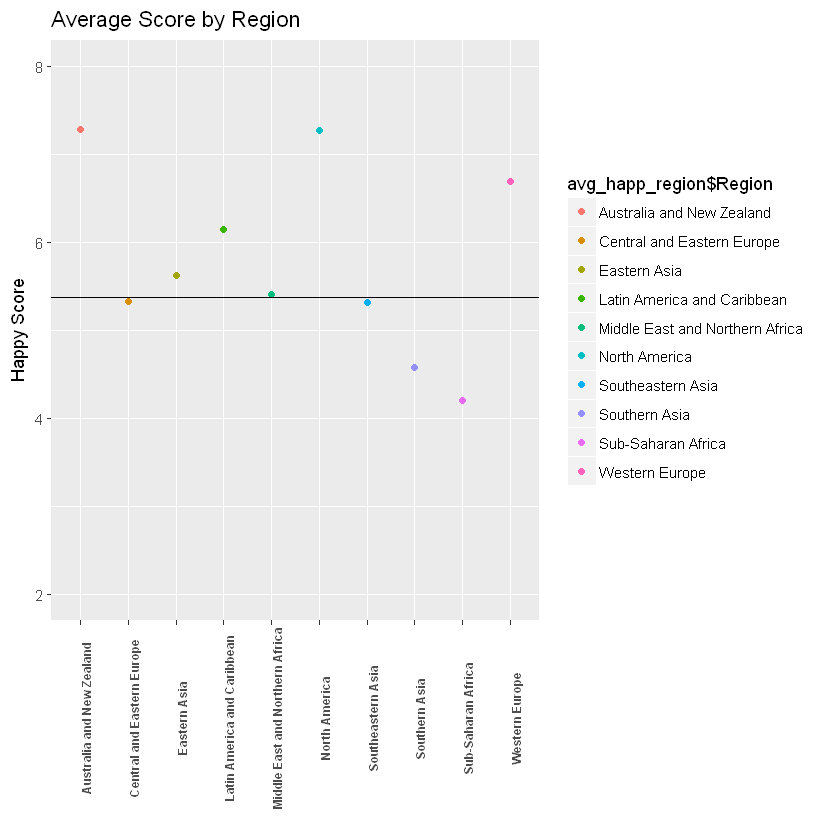

In [26]:
avg_happ_region <-aggregate(happy$`Happiness Score`,list(happy$Region), mean)
colnames(avg_happ_region) <- c("Region","Median Score")
qplot(y=avg_happ_region$`Median Score`,x=factor(avg_happ_region$Region),
      data =avg_happ_region,geom ="point",colour=avg_happ_region$Region)+
  theme(axis.text.x  = element_text(angle=90,size = 7,face = "bold"))+
  xlab("")+ylim(2,8)+ylab("Happy Score")+ggtitle("Average Score by Region")+
  geom_hline(yintercept = 5.376)

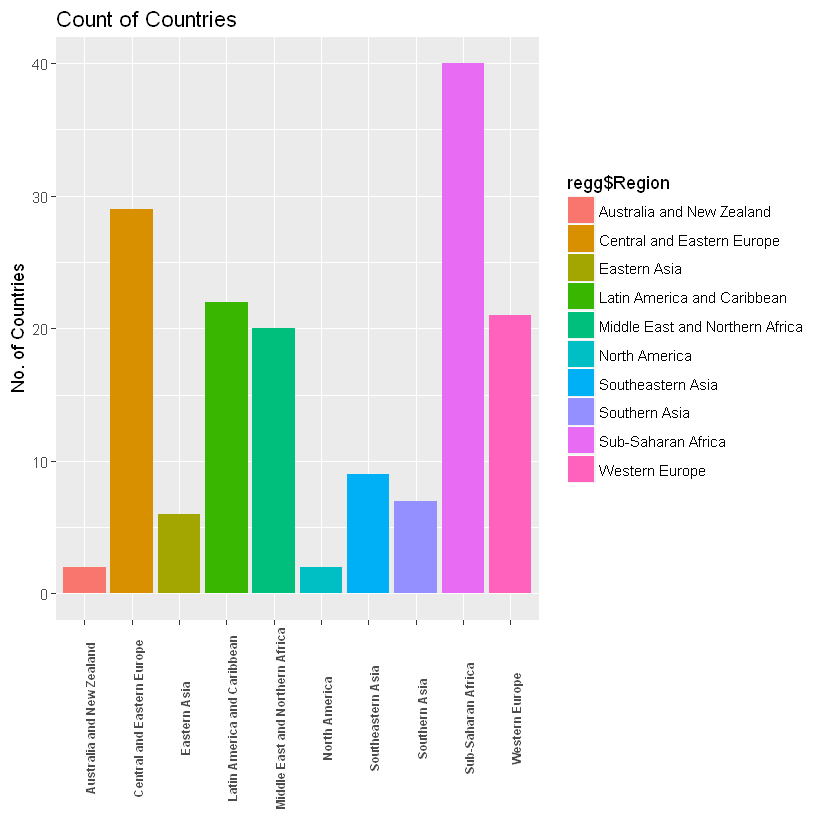

In [28]:
hapreg <- table(happy$Region)
regg <- data.frame(hapreg)
colnames(regg) <- c('Region','No. of Countries')
par(mfrow=c(1,1))
ggplot(regg,aes(x=regg$Region,y=regg$`No. of Countries`,fill = regg$Region))+
  geom_bar(stat ="identity")+
  theme(axis.text.x  = element_text(angle=90,size = 7,face = "bold"))+
  xlab("")+ylab("No. of Countries")+ggtitle("Count of Countries")

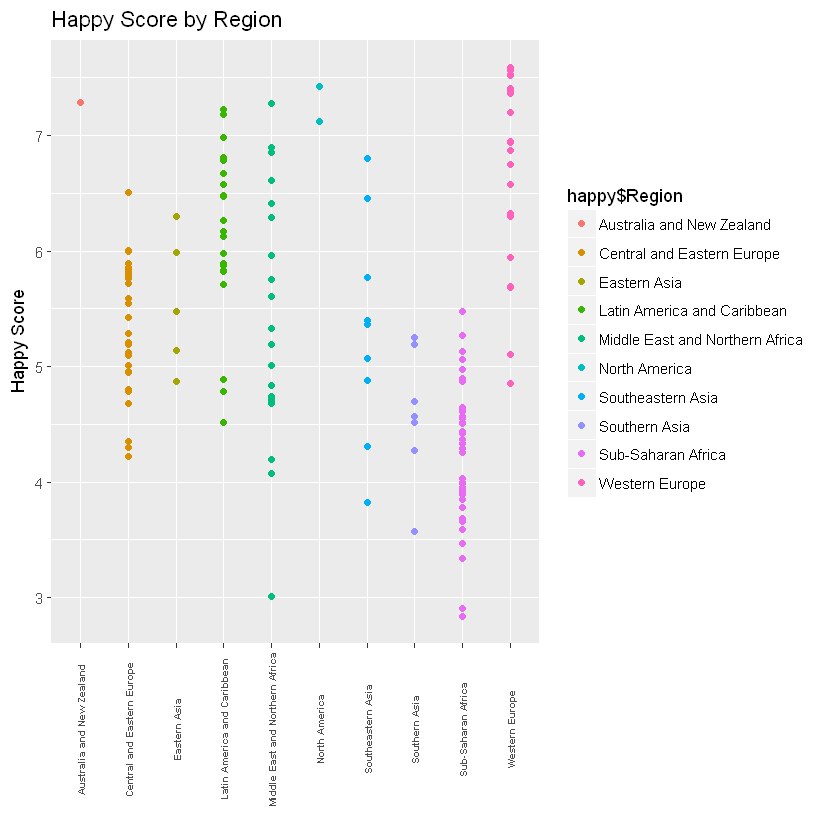

In [29]:
ggplot(happy,aes(x = happy$Region, y = happy$`Happiness Score`,
                 colour = happy$Region))+geom_point()+
  ggtitle("Happy Score by Region")+xlab("")+
  ylab("Happy Score")+
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=6,face ="bold"))


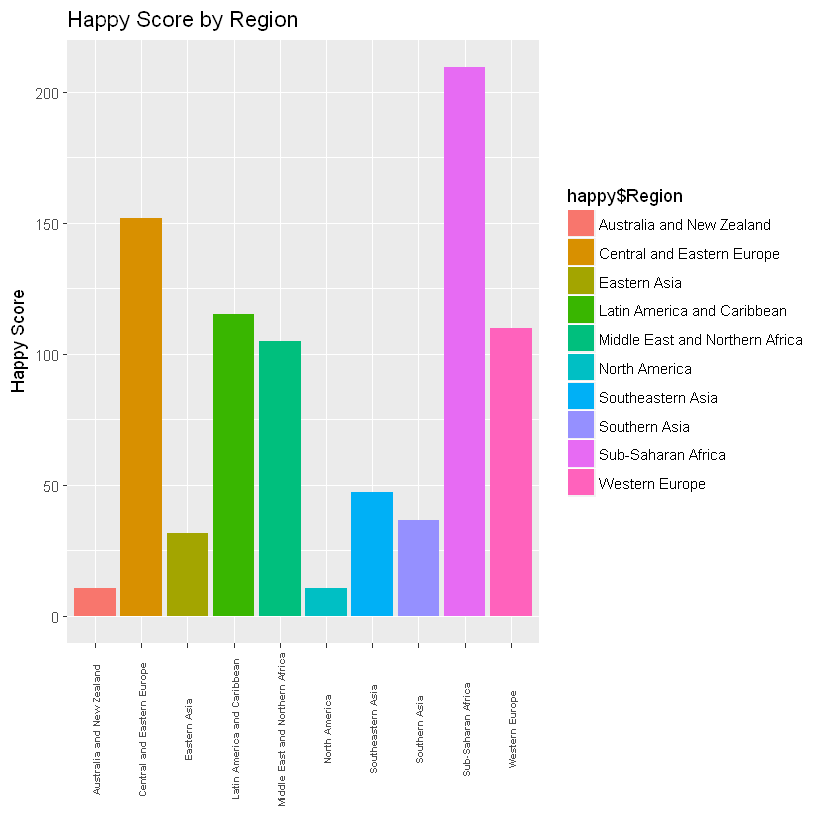

In [30]:

qplot(x = happy$Region, y = median(happy$`Happiness Score`), 
      data = happy,fill = happy$Region)+geom_bar(stat='identity')+
  ggtitle("Happy Score by Region")+xlab("")+
  ylab("Happy Score")+
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=6,face ="bold"))


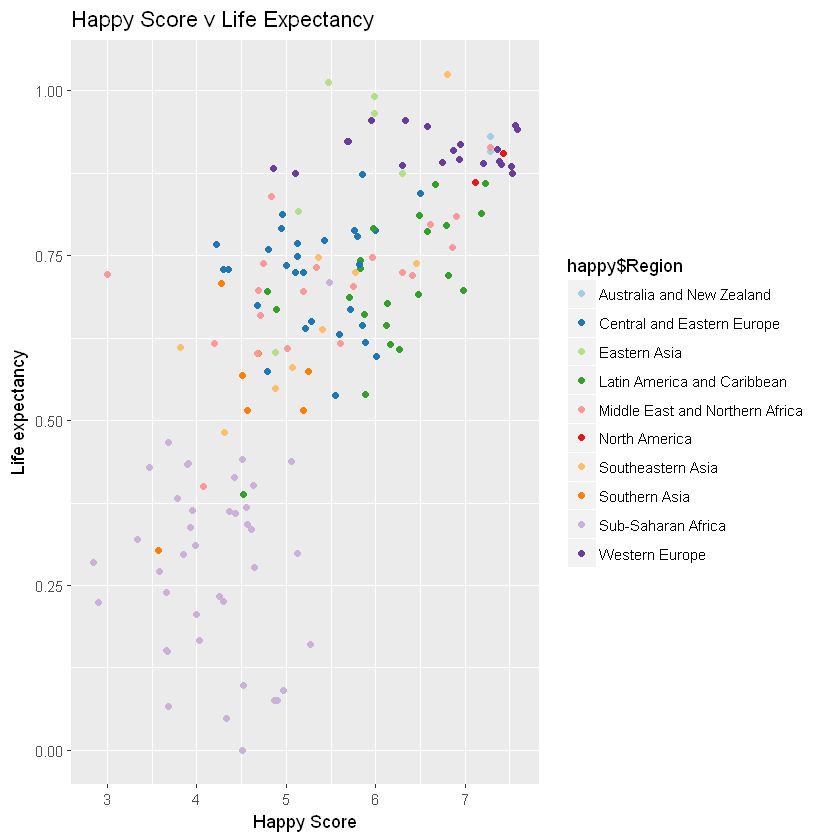

In [31]:
qplot(x = happy$`Happiness Score`, y = happy$`Health (Life Expectancy)`, 
      data = happy, geom = "point",colour = happy$Region)+
  ggtitle("Happy Score v Life Expectancy")+xlab("Happy Score")+
  ylab("Life expectancy")+
  scale_color_brewer(palette="Paired")

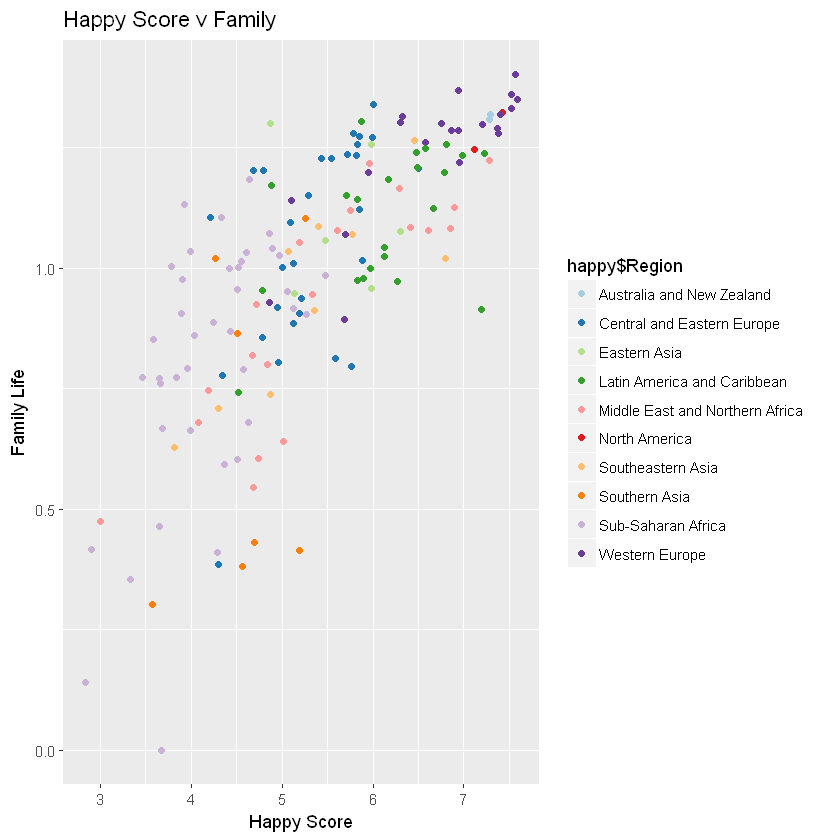

In [32]:
qplot(x = happy$`Happiness Score`, y = happy$Family, 
      data = happy, geom = "point",colour = happy$Region)+
  ggtitle("Happy Score v Family")+xlab("Happy Score")+
  ylab("Family Life")+scale_color_brewer(palette="Paired")


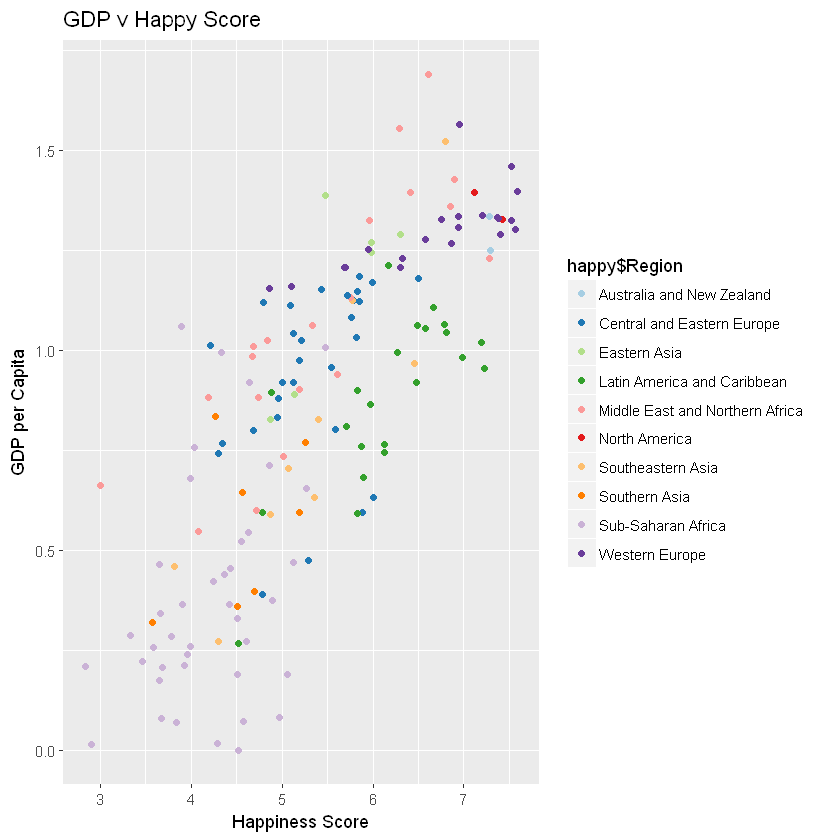

In [33]:
qplot(x = happy$`Happiness Score` , y = happy$`Economy (GDP per Capita)`, 
      data = happy, geom = "point",colour = happy$Region)+
  xlab("Happiness Score")+ylab("GDP per Capita")+ggtitle("GDP v Happy Score")+
  scale_color_brewer(palette="Paired")

In [34]:
X2017 <- read_csv("C:/Users/tshan/Desktop/2017.csv")

Parsed with column specification:
cols(
  Country = col_character(),
  Happiness.Rank = col_integer(),
  Happiness.Score = col_double(),
  Whisker.high = col_double(),
  Whisker.low = col_double(),
  Economy..GDP.per.Capita. = col_double(),
  Family = col_double(),
  Health..Life.Expectancy. = col_double(),
  Freedom = col_double(),
  Generosity = col_double(),
  Trust..Government.Corruption. = col_double(),
  Dystopia.Residual = col_double()
)


In [39]:
happy17 <- X2017

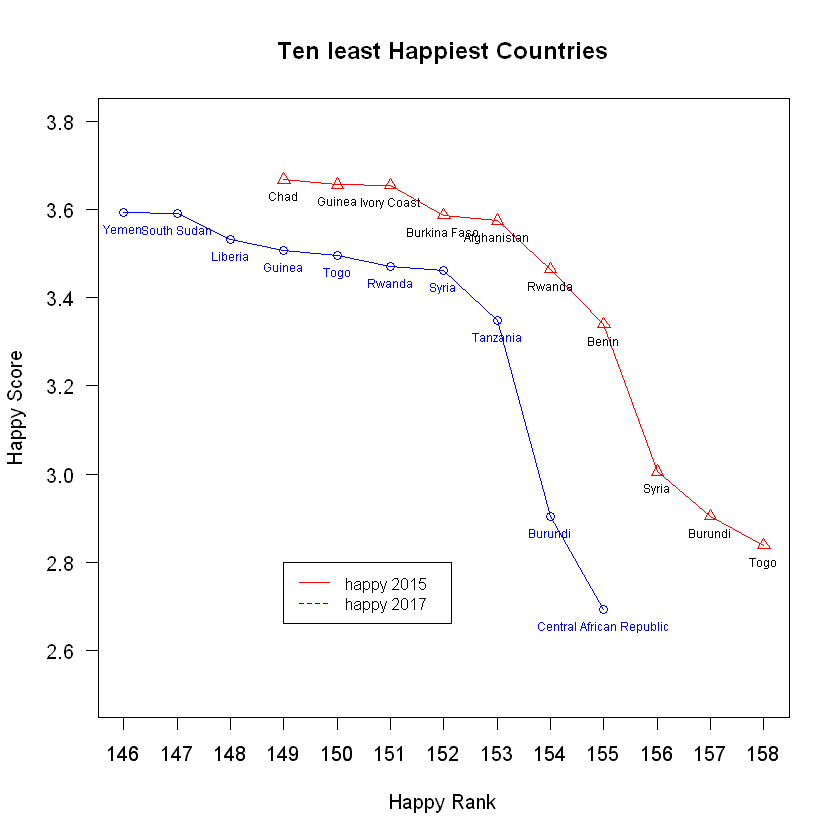

In [40]:
plot(happy$`Happiness Score`[149:158]~happy$`Happiness Rank`[149:158], type = 'o',
     xlab = 'Happy Rank',ylab = 'Happy Score',pch = 2, col = 'Red',
     main = "Ten least Happiest Countries",ylim =c(2.5,3.8),las=1,
     xlim=c(146,158))
text(happy$`Happiness Score`[149:158]~happy$`Happiness Rank`[149:158] ,
     labels=happy$Country[149:158],pos=1,cex =0.6)
axis(1,at = seq(146,158,by=1))
lines(happy17$Happiness.Score[146:158]~happy17$Happiness.Rank[146:158], 
      type = 'o',col ="blue")
text(happy17$Happiness.Score[146:158]~happy17$Happiness.Rank[146:158] ,
     labels=happy17$Country[146:158],pos=1,cex =0.6,col ="blue")
axis(1,at = seq(146,158,by=1))
legend(149,2.8, legend=c("happy 2015", "happy 2017"),
       col=c("red", "blue"), lty=1:2, cex=0.8)


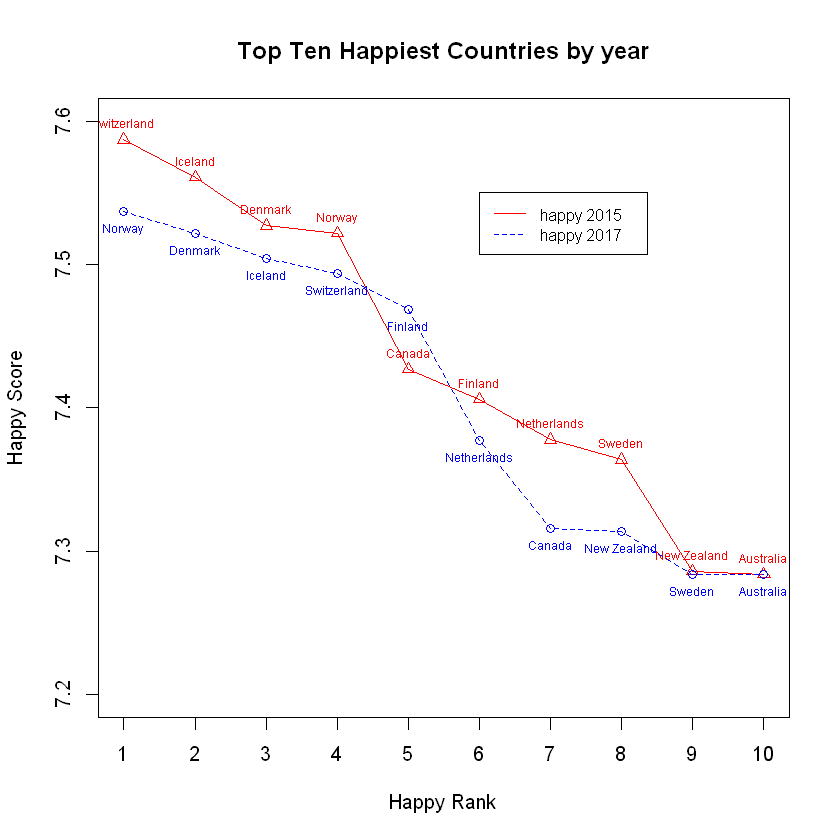

In [41]:
plot(happy$`Happiness Score`[1:10]~happy$`Happiness Rank`[1:10], type = 'o',
     xlab = 'Happy Rank',ylab = 'Happy Score',pch = 2, col = 'Red',
     main = "Top Ten Happiest Countries by year",ylim =c(7.20,7.6))
text(happy$`Happiness Score`[1:10]~happy$`Happiness Rank`[1:10], labels=happy$Country[1:10]
     ,pos=3,cex =0.6,col ="red")
axis(1,at = seq(1,10))
lines(happy17$Happiness.Score[1:10]~happy17$Happiness.Rank[1:10], type = 'o',lty=2,col ="blue")
text(happy17$Happiness.Score [1:10]~happy17$Happiness.Rank[1:10], labels=happy17$Country[1:10]
     ,pos=1,cex =0.6,col ="blue")
legend(6, 7.55, legend=c("happy 2015", "happy 2017"),
       col=c("red", "blue"), lty=1:2, cex=0.8)